# Dataset 2 - "previous_application.csv"

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import itertools # using itertools for efficient looping plotting subplots

In [2]:
# to suppress warnings
import warnings   
warnings.filterwarnings("ignore")

#notebook setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', False)

#### 1. reading and understanding the data

##### 1.1 Importing the dataset


In [3]:
# importing previous_application.csv

previous_data = pd.read_csv("previous_application.csv")

In [4]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Checking rows and columns of the raw data
previous_data.shape

(1670214, 37)

In [6]:
#Checking information of all the columns like data types
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [7]:
# Checking the numeric variables of the dataframes
previous_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


**Observation**

- there are 37 columns and 1670214 rows.
- there columns having negative, postive values which includes days. fixing is required


In [8]:
previous_data.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

We can see that there are: </font></br>

15 columns with dtype=float64 </font></br>
6 columns with dtype=int64 </font></br>
16 columns with dtype=object

In [9]:
# Get the count,size and unique values in each column of application data
previous_data.agg(['count','size','nunique'])

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214,1670214,1670214,1297979,1670214,1670213,774370,1284699,1670214,1670214,1670214,1670214,774370,5951,5951,1670214,1670214,1670214,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1297984,1670214,1669868,997149,997149,997149,997149,997149,997149
size,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214
nunique,1670214,338857,4,357959,93885,86803,29278,93885,7,24,2,2,207033,148,25,25,4,2922,4,9,7,4,28,5,3,8,2097,11,49,5,17,2838,2892,4605,2873,2830,2


#### 2. Data Cleaning & Manipulation

##### 2.1 Null Values

In [10]:
previous_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [11]:
# Identifying missing values in each column
#Function to calculate null_values to identify % of data is missing in each column
def null_values(df):
    total = df.isnull().sum()
    datatypes = df.dtypes
    unique = df.nunique()
    percent = round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)
    # percent = (df.isnull().sum()/df.isnull().count()*100)
    return pd.concat([total, datatypes, unique, percent], axis=1, keys=['Total', 'Data_Type', 'Unique', 'Percent']).sort_values(by="Percent", ascending=False)

In [12]:
#calculating null_values_data for application_data
null_values_data=null_values(previous_data)
null_values_data

,Total,Data_Type,Unique,Percent
RATE_INTEREST_PRIVILEGED,1664263,float64,25,99.64
RATE_INTEREST_PRIMARY,1664263,float64,148,99.64
RATE_DOWN_PAYMENT,895844,float64,207033,53.64
AMT_DOWN_PAYMENT,895844,float64,29278,53.64
NAME_TYPE_SUITE,820405,object,7,49.12
NFLAG_INSURED_ON_APPROVAL,673065,float64,2,40.30
DAYS_FIRST_DRAWING,673065,float64,2838,40.30
DAYS_FIRST_DUE,673065,float64,2892,40.30
DAYS_LAST_DUE_1ST_VERSION,673065,float64,4605,40.30
DAYS_LAST_DUE,673065,float64,2873,40.30


##### 2.1.1 Dealing with Null values more than 50%

In [13]:
# Dropping columns with High Missing Values more than 50% missing values

cols_to_keep=list(null_values_data[(null_values_data.Percent<50)].index)
cols_to_keep

['NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'CHANNEL_TYPE',
 'NAME_PRODUCT_TYPE',
 'NAME_YIELD_GROUP',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'SK_ID_PREV',
 'NAME_CLIENT_TYPE',
 'CODE_REJECT_REASON',
 'SK_ID_CURR',
 'DAYS_DECISION',
 'NAME_CONTRACT_STATUS',
 'NAME_CASH_LOAN_PURPOSE',
 'NFLAG_LAST_APPL_IN_DAY',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'HOUR_APPR_PROCESS_START',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_CREDIT',
 'AMT_APPLICATION',
 'NAME_CONTRACT_TYPE',
 'NAME_PAYMENT_TYPE']

In [14]:
previous_data=previous_data[cols_to_keep]
previous_data.describe()

,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,SELLERPLACE_AREA,SK_ID_PREV,SK_ID_CURR,DAYS_DECISION,NFLAG_LAST_APPL_IN_DAY,HOUR_APPR_PROCESS_START,AMT_CREDIT,AMT_APPLICATION
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06
mean,0.332570,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,2.278473e+05,1.595512e+04,1.605408e+01,3.139511e+02,1.923089e+06,2.783572e+05,-8.806797e+02,9.964675e-01,1.248418e+01,1.961140e+05,1.752339e+05
std,0.471134,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,3.153966e+05,1.478214e+04,1.456729e+01,7.127443e+03,5.325980e+05,1.028148e+05,7.790997e+02,5.932963e-02,3.334028e+00,3.185746e+05,2.927798e+05
min,0.000000,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000001e+06,1.000010e+05,-2.922000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,5.084100e+04,6.321780e+03,6.000000e+00,-1.000000e+00,1.461857e+06,1.893290e+05,-1.300000e+03,1.000000e+00,1.000000e+01,2.416050e+04,1.872000e+04
50%,0.000000,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,1.123200e+05,1.125000e+04,1.200000e+01,3.000000e+00,1.923110e+06,2.787145e+05,-5.810000e+02,1.000000e+00,1.200000e+01,8.054100e+04,7.104600e+04
75%,1.000000,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,2.340000e+05,2.065842e+04,2.400000e+01,8.200000e+01,2.384280e+06,3.675140e+05,-2.800000e+02,1.000000e+00,1.500000e+01,2.164185e+05,1.803600e+05
max,1.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,6.905160e+06,4.180581e+05,8.400000e+01,4.000000e+06,2.845382e+06,4.562550e+05,-1.000000e+00,1.000000e+00,2.300000e+01,6.905160e+06,6.905160e+06


In [15]:
previous_data.shape  # Now there are 33 columns remaining

(1670214, 33)

In [16]:
#revieving null columns which have been removed more than 50% of null values.
cols_to_remove=list(null_values_data[(null_values_data.Percent>50)].index)
print("Num of columns having missing values more than 50% :",len(cols_to_remove))

Num of columns having missing values more than 50% : 4


**Observation:**

There are 4 columns having null values more than 50%.

##### 2.1.2 Dealing with Null values columns with very less missing values

In [17]:
null_col_less_15=pd.DataFrame(null_values_data[(null_values_data.Percent>0)&(null_values_data.Percent<15)])

null_col_less_15

,Total,Data_Type,Unique,Percent
PRODUCT_COMBINATION,346,object,17,0.02


##### 2.1.3 Dealing with Null values columns with greater tha 15% and less than 50%

In [18]:
#creating a variable p_null_col_15 for storing null columns having missing values more than 15%
null_col_more_15_less_50=pd.DataFrame(null_values_data[(null_values_data.Percent>15)])
null_col_more_15_less_50

,Total,Data_Type,Unique,Percent
RATE_INTEREST_PRIVILEGED,1664263,float64,25,99.64
RATE_INTEREST_PRIMARY,1664263,float64,148,99.64
RATE_DOWN_PAYMENT,895844,float64,207033,53.64
AMT_DOWN_PAYMENT,895844,float64,29278,53.64
NAME_TYPE_SUITE,820405,object,7,49.12
NFLAG_INSURED_ON_APPROVAL,673065,float64,2,40.30
DAYS_FIRST_DRAWING,673065,float64,2838,40.30
DAYS_FIRST_DUE,673065,float64,2892,40.30
DAYS_LAST_DUE_1ST_VERSION,673065,float64,4605,40.30
DAYS_LAST_DUE,673065,float64,2873,40.30


In [19]:
null_values(previous_data)

,Total,Data_Type,Unique,Percent
NAME_TYPE_SUITE,820405,object,7,49.12
NFLAG_INSURED_ON_APPROVAL,673065,float64,2,40.30
DAYS_FIRST_DRAWING,673065,float64,2838,40.30
DAYS_FIRST_DUE,673065,float64,2892,40.30
DAYS_LAST_DUE_1ST_VERSION,673065,float64,4605,40.30
DAYS_LAST_DUE,673065,float64,2873,40.30
DAYS_TERMINATION,673065,float64,2830,40.30
AMT_GOODS_PRICE,385515,float64,93885,23.08
AMT_ANNUITY,372235,float64,357959,22.29
CNT_PAYMENT,372230,float64,49,22.29


In [20]:

p_null_col_15 = null_values(previous_data)[null_values(previous_data)["Percent"]>15]

In [21]:
p_null_col_15

,Total,Data_Type,Unique,Percent
NAME_TYPE_SUITE,820405,object,7,49.12
NFLAG_INSURED_ON_APPROVAL,673065,float64,2,40.30
DAYS_FIRST_DRAWING,673065,float64,2838,40.30
DAYS_FIRST_DUE,673065,float64,2892,40.30
DAYS_LAST_DUE_1ST_VERSION,673065,float64,4605,40.30
DAYS_LAST_DUE,673065,float64,2873,40.30
DAYS_TERMINATION,673065,float64,2830,40.30
AMT_GOODS_PRICE,385515,float64,93885,23.08
AMT_ANNUITY,372235,float64,357959,22.29
CNT_PAYMENT,372230,float64,49,22.29


In [22]:
previous_data[p_null_col_15.index]

,NAME_TYPE_SUITE,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
0,NaN,0.0,365243.0,-42.0,300.0,-42.0,-37.0,17145.0,1730.430,12.0
1,Unaccompanied,1.0,365243.0,-134.0,916.0,365243.0,365243.0,607500.0,25188.615,36.0
2,"Spouse, partner",1.0,365243.0,-271.0,59.0,365243.0,365243.0,112500.0,15060.735,12.0
3,NaN,1.0,365243.0,-482.0,-152.0,-182.0,-177.0,450000.0,47041.335,12.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337500.0,31924.395,24.0
...,...,...,...,...,...,...,...,...,...,...
1670209,NaN,0.0,365243.0,-508.0,362.0,-358.0,-351.0,267295.5,14704.290,30.0
1670210,Unaccompanied,0.0,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,87750.0,6622.020,12.0
1670211,"Spouse, partner",0.0,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,105237.0,11520.855,10.0
1670212,Family,1.0,365243.0,-1155.0,-825.0,-825.0,-817.0,180000.0,18821.520,12.0


In [23]:
previous_data.columns

Index(['NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'PRODUCT_COMBINATION', 'CHANNEL_TYPE', 'NAME_PRODUCT_TYPE', 'NAME_YIELD_GROUP', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'SK_ID_PREV', 'NAME_CLIENT_TYPE', 'CODE_REJECT_REASON', 'SK_ID_CURR', 'DAYS_DECISION', 'NAME_CONTRACT_STATUS', 'NAME_CASH_LOAN_PURPOSE', 'NFLAG_LAST_APPL_IN_DAY', 'FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START', 'AMT_CREDIT', 'AMT_APPLICATION', 'NAME_CONTRACT_TYPE', 'NAME_PAYMENT_TYPE'], dtype='object')

In [24]:
# Listing down columns which are not needed
Unnecessary_prev = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

previous_data.drop(Unnecessary_prev,axis =1, inplace = True)

previous_data.shape

(1670214, 29)

In [25]:
# IMputing values "Unknown" as this a categorical column
previous_data["NAME_TYPE_SUITE"] = previous_data["NAME_TYPE_SUITE"].fillna("Unknown")

null_values(previous_data)

,Total,Data_Type,Unique,Percent
NFLAG_INSURED_ON_APPROVAL,673065,float64,2,40.30
DAYS_FIRST_DRAWING,673065,float64,2838,40.30
DAYS_FIRST_DUE,673065,float64,2892,40.30
DAYS_LAST_DUE_1ST_VERSION,673065,float64,4605,40.30
DAYS_LAST_DUE,673065,float64,2873,40.30
DAYS_TERMINATION,673065,float64,2830,40.30
AMT_GOODS_PRICE,385515,float64,93885,23.08
CNT_PAYMENT,372230,float64,49,22.29
AMT_ANNUITY,372235,float64,357959,22.29
PRODUCT_COMBINATION,346,object,17,0.02


**Observation**

* **There are missing values in columns 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE' and these columns count days thus will keeping null values as they are** 

### 2.2 Imputing and dealing with days contains negative values

In [26]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   NAME_TYPE_SUITE            1670214 non-null  object 
 1   NFLAG_INSURED_ON_APPROVAL  997149 non-null   float64
 2   DAYS_FIRST_DRAWING         997149 non-null   float64
 3   DAYS_FIRST_DUE             997149 non-null   float64
 4   DAYS_LAST_DUE_1ST_VERSION  997149 non-null   float64
 5   DAYS_LAST_DUE              997149 non-null   float64
 6   DAYS_TERMINATION           997149 non-null   float64
 7   AMT_GOODS_PRICE            1284699 non-null  float64
 8   AMT_ANNUITY                1297979 non-null  float64
 9   CNT_PAYMENT                1297984 non-null  float64
 10  PRODUCT_COMBINATION        1669868 non-null  object 
 11  CHANNEL_TYPE               1670214 non-null  object 
 12  NAME_PRODUCT_TYPE          1670214 non-null  object 
 13  NAME_YIELD_G

In [27]:
# To convert negative days to postive days creating a varaible "p_days_col"

p_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

# Analysis before conversion
previous_data[p_days_col].describe() 

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,-8.806797e+02,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838
std,7.790997e+02,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729
min,-2.922000e+03,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,-1.300000e+03,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000
50%,-5.810000e+02,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000
75%,-2.800000e+02,365243.000000,-411.000000,129.000000,-74.000000,-44.000000
max,-1.000000e+00,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


In [28]:
# Converting Negative days to positive days

previous_data[p_days_col] = abs(previous_data[p_days_col])

# analysing after conversion
previous_data[p_null_col_15.index].describe() 

,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,0.332570,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,2.278473e+05,1.595512e+04,1.605408e+01
std,0.471134,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,3.153966e+05,1.478214e+04,1.456729e+01
min,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,365243.000000,475.000000,257.000000,455.000000,447.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,0.000000,365243.000000,921.000000,741.000000,1155.000000,1171.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,1.000000,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,1.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,6.905160e+06,4.180581e+05,8.400000e+01


In [29]:
#days group calculation e.g. 369 will be grouped as with in 2 years

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
previous_data['YEARLY_DECISION'] = pd.cut(previous_data['DAYS_DECISION'],bins,labels=slots)

In [30]:
previous_data['YEARLY_DECISION'].value_counts(normalize=True)*100

1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: YEARLY_DECISION, dtype: float64

**Observation:**
* **Around 34% loan applicatants have applied for a new loan within 1 year of previous loan decision**

In [31]:
null_values(previous_data)

,Total,Data_Type,Unique,Percent
DAYS_FIRST_DRAWING,673065,float64,2838,40.30
DAYS_FIRST_DUE,673065,float64,2892,40.30
DAYS_LAST_DUE_1ST_VERSION,673065,float64,2803,40.30
DAYS_LAST_DUE,673065,float64,2873,40.30
DAYS_TERMINATION,673065,float64,2830,40.30
NFLAG_INSURED_ON_APPROVAL,673065,float64,2,40.30
AMT_GOODS_PRICE,385515,float64,93885,23.08
AMT_ANNUITY,372235,float64,357959,22.29
CNT_PAYMENT,372230,float64,49,22.29
PRODUCT_COMBINATION,346,object,17,0.02


### 2.4 dealing with continuos variables "AMT_ANNUITY", "AMT_GOODS_PRICE" 
#### To impute null values in continuous variables, we plotted the distribution of the columns and used
* **median if the distribution is skewed**
* **mode if the distribution pattern is preserved.**

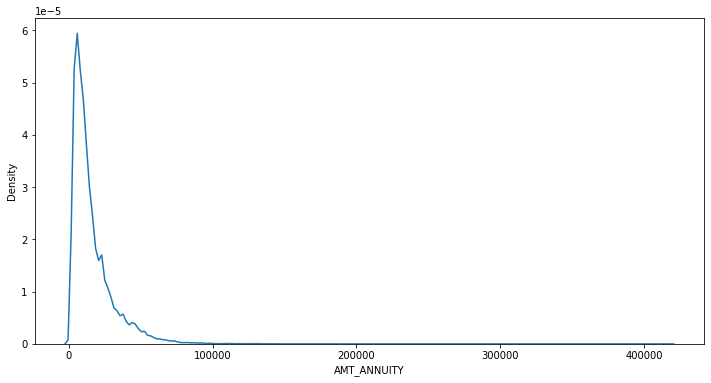

In [32]:
#plotting a kdeplot to understand distribution of "AMT_ANNUITY"

plt.figure(figsize=(12,6))
sns.kdeplot(previous_data['AMT_ANNUITY'], palette="set2")
plt.show()

**Observation:**
* **There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.**

In [33]:
#imputing missing values with median 

previous_data['AMT_ANNUITY'].fillna(previous_data['AMT_ANNUITY'].median(),inplace = True)

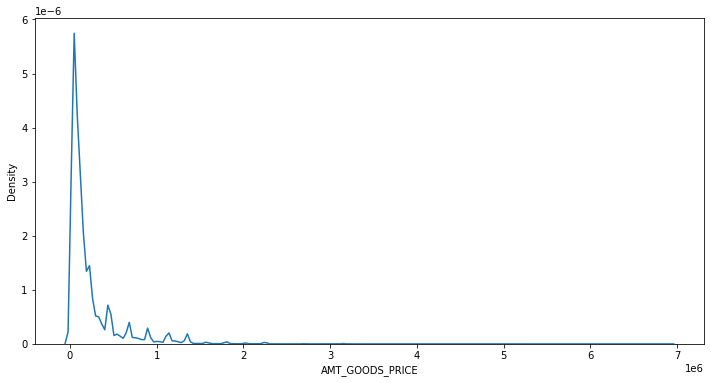

In [34]:
# Plotting kde plot for "AMT_GOODS_PRICE" to understand the distribution

plt.figure(figsize=(12,6))
sns.kdeplot(previous_data['AMT_GOODS_PRICE'])
plt.show()

**Observation**
* **There are several peaks along the distribution which is right skewed.
- **Now imputing using the mode, mean and median and see if the distribution is still about the same.**

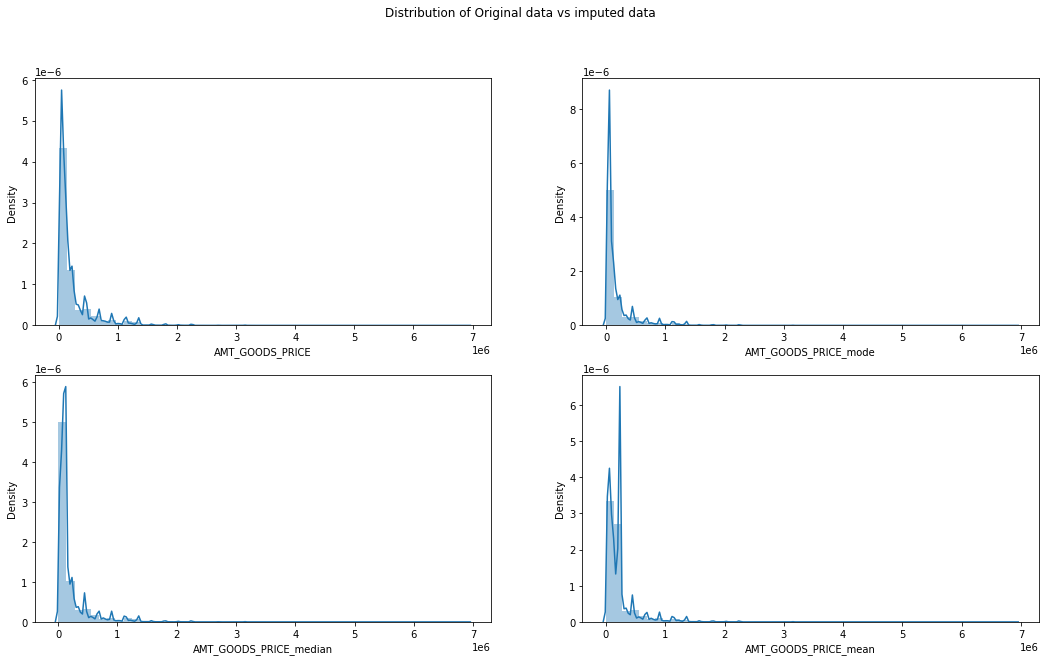

In [35]:
# Creating new dataframe for "AMT_GOODS_PRICE" with columns imputed with mode, median and mean

statsDF = pd.DataFrame() 
statsDF['AMT_GOODS_PRICE_mode'] = previous_data['AMT_GOODS_PRICE'].fillna(previous_data['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = previous_data['AMT_GOODS_PRICE'].fillna(previous_data['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = previous_data['AMT_GOODS_PRICE'].fillna(previous_data['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(previous_data['AMT_GOODS_PRICE'][pd.notnull(previous_data['AMT_GOODS_PRICE'])])
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

**Observation**


* **The original distribution is closer with the distribution of data imputed with mode in this case, thus will impute mode for missing values**

In [36]:
# Imputing null values with mode

previous_data['AMT_GOODS_PRICE'].fillna(previous_data['AMT_GOODS_PRICE'].mode()[0], inplace=True)

## Finding Outliers

#### imputing missing values for AMT_ANNUITY

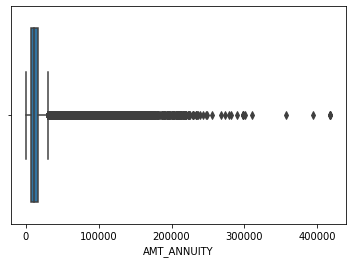

In [37]:

sns.boxplot(previous_data.AMT_ANNUITY)
plt.show()

**Observation**

Since the column has many outliers hence imputing with median is the best method.

In [38]:
#since the column has many outliers hence imputing with median is the best method.
previous_data.AMT_ANNUITY.fillna(previous_data.AMT_ANNUITY.median(), inplace = True)

In [39]:
previous_data.AMT_ANNUITY.isnull().sum()

0

In [40]:
null_values(previous_data)

,Total,Data_Type,Unique,Percent
DAYS_FIRST_DRAWING,673065,float64,2838,40.30
DAYS_FIRST_DUE,673065,float64,2892,40.30
DAYS_LAST_DUE_1ST_VERSION,673065,float64,2803,40.30
DAYS_LAST_DUE,673065,float64,2873,40.30
DAYS_TERMINATION,673065,float64,2830,40.30
NFLAG_INSURED_ON_APPROVAL,673065,float64,2,40.30
CNT_PAYMENT,372230,float64,49,22.29
PRODUCT_COMBINATION,346,object,17,0.02
NAME_CASH_LOAN_PURPOSE,0,object,25,0.00
SK_ID_CURR,0,int64,338857,0.00


#### imputing the AMT_CREDIT with median

In [41]:
previous_data.AMT_CREDIT.fillna(previous_data.AMT_CREDIT.median(), inplace = True)

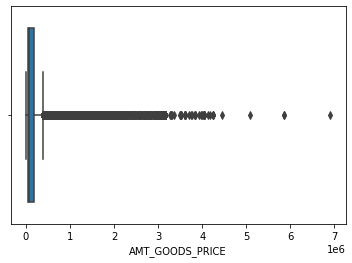

In [42]:
#imputing missing values for AMT_GOODS_PRICE
sns.boxplot(previous_data.AMT_GOODS_PRICE)
plt.show()

In [43]:
#since the column has many outliers hence imputing with median is the best method.
previous_data.AMT_GOODS_PRICE.fillna(previous_data.AMT_GOODS_PRICE.median(), inplace = True)

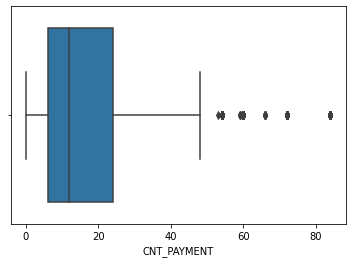

In [44]:
#imputing missing values for CNT_PAYMENT
sns.boxplot(previous_data.CNT_PAYMENT)
plt.show()

**Observation**

There are some outliers, however it lies between the 5-22 in range of quantile of 0.25-0.75 </br>
since the column has outliers hence imputing with median is the best method.

In [45]:
#since the column has outliers hence imputing with median is the best method.
previous_data.CNT_PAYMENT.fillna(previous_data.CNT_PAYMENT.median(), inplace = True)

In [46]:
previous_data.CNT_PAYMENT.isnull().sum()

0

In [47]:
#PRODUCT_COMBINATION
previous_data.PRODUCT_COMBINATION.unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

#### Checking for outliers

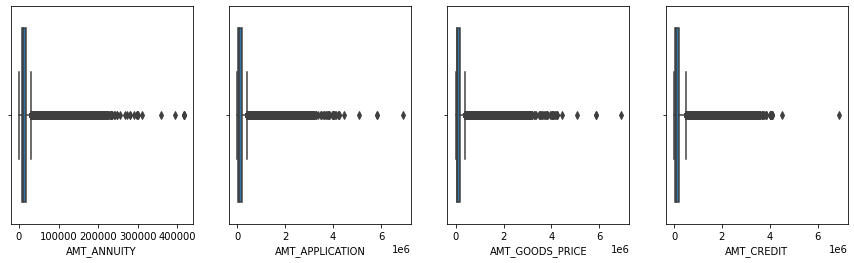

In [48]:
plt.figure(figsize = (15,4))

plt.subplot(1,4,1)
sns.boxplot(previous_data.AMT_ANNUITY)

plt.subplot(1,4,2)
sns.boxplot(previous_data.AMT_APPLICATION)

plt.subplot(1,4,3)
sns.boxplot(previous_data.AMT_GOODS_PRICE)

plt.subplot(1,4,4)
sns.boxplot(previous_data.AMT_CREDIT)
plt.show()

In [49]:
#Capping of outliers
#AMT_ANNUITY
Q3=previous_data.AMT_ANNUITY.quantile(0.75)
Q1=previous_data.AMT_ANNUITY.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

9276.930000000002 30739.421250000007 -6368.298750000004


In [50]:
previous_data.AMT_ANNUITY=np.where(previous_data.AMT_ANNUITY>upper_bound,upper_bound,previous_data.AMT_ANNUITY)

In [51]:
#AMT_APPLICATION
Q3=previous_data.AMT_APPLICATION.quantile(0.75)
Q1=previous_data.AMT_APPLICATION.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

161640.0 422820.0 -223740.0


In [52]:
previous_data.AMT_APPLICATION=np.where(previous_data.AMT_APPLICATION>upper_bound,upper_bound,previous_data.AMT_APPLICATION)

In [53]:
#AMT_GOODS_PRICE
Q3=previous_data.AMT_GOODS_PRICE.quantile(0.75)
Q1=previous_data.AMT_GOODS_PRICE.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

135405.0 383512.5 -158107.5


In [54]:
previous_data.AMT_GOODS_PRICE=np.where(previous_data.AMT_GOODS_PRICE>upper_bound,upper_bound,previous_data.AMT_GOODS_PRICE)

In [55]:
#AMT_CREDIT
Q3=previous_data.AMT_CREDIT.quantile(0.75)
Q1=previous_data.AMT_CREDIT.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

192258.0 504805.5 -264226.5


In [56]:
previous_data.AMT_CREDIT=np.where(previous_data.AMT_CREDIT>upper_bound,upper_bound,previous_data.AMT_CREDIT)

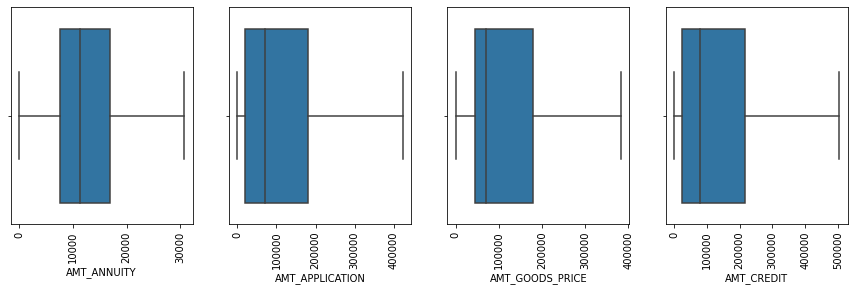

In [57]:
plt.figure(figsize = (15,4))

plt.subplot(1,4,1)
sns.boxplot(previous_data.AMT_ANNUITY)
plt.xticks(rotation = 90)

plt.subplot(1,4,2)
sns.boxplot(previous_data.AMT_APPLICATION)
plt.xticks(rotation = 90)

plt.subplot(1,4,3)
sns.boxplot(previous_data.AMT_GOODS_PRICE)
plt.xticks(rotation = 90)

plt.subplot(1,4,4)
sns.boxplot(previous_data.AMT_CREDIT)
plt.xticks(rotation = 90)
plt.show()

**Observation**

- Now we have deal with the outliers and removed it based on analysing the above situation and left with no outliers for these data AMT_ANNUITY, AMT_APPLICATION, AMT_GOODS_PRICE, AMT_CREDIT

In [58]:
previous_data.head()

,NAME_TYPE_SUITE,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,PRODUCT_COMBINATION,CHANNEL_TYPE,NAME_PRODUCT_TYPE,NAME_YIELD_GROUP,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,SK_ID_PREV,NAME_CLIENT_TYPE,CODE_REJECT_REASON,SK_ID_CURR,DAYS_DECISION,NAME_CONTRACT_STATUS,NAME_CASH_LOAN_PURPOSE,AMT_CREDIT,AMT_APPLICATION,NAME_CONTRACT_TYPE,NAME_PAYMENT_TYPE,YEARLY_DECISION
0,Unknown,0.0,365243.0,42.0,300.0,42.0,37.0,17145.0,1730.43000,12.0,POS mobile with interest,Country-wide,XNA,middle,35,Connectivity,Mobile,POS,2030495,Repeater,XAP,271877,73,Approved,XAP,17145.0,17145.0,Consumer loans,Cash through the bank,1
1,Unaccompanied,1.0,365243.0,134.0,916.0,365243.0,365243.0,383512.5,25188.61500,36.0,Cash X-Sell: low,Contact center,x-sell,low_action,-1,XNA,XNA,Cash,2802425,Repeater,XAP,108129,164,Approved,XNA,504805.5,422820.0,Cash loans,XNA,1
2,"Spouse, partner",1.0,365243.0,271.0,59.0,365243.0,365243.0,112500.0,15060.73500,12.0,Cash X-Sell: high,Credit and cash offices,x-sell,high,-1,XNA,XNA,Cash,2523466,Repeater,XAP,122040,301,Approved,XNA,136444.5,112500.0,Cash loans,Cash through the bank,1
3,Unknown,1.0,365243.0,482.0,152.0,182.0,177.0,383512.5,30739.42125,12.0,Cash X-Sell: middle,Credit and cash offices,x-sell,middle,-1,XNA,XNA,Cash,2819243,Repeater,XAP,176158,512,Approved,XNA,470790.0,422820.0,Cash loans,Cash through the bank,2
4,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,337500.0,30739.42125,24.0,Cash Street: high,Credit and cash offices,walk-in,high,-1,XNA,XNA,Cash,1784265,Repeater,HC,202054,781,Refused,Repairs,404055.0,337500.0,Cash loans,Cash through the bank,3


## Analysis of Data

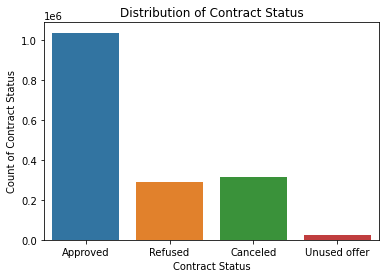

In [59]:
sns.countplot(previous_data.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

**Observation**

- High distribution of contract status is Approved whereas lower one is Unused offer

In [60]:
prev_meta_data=null_values(previous_data)
prev_meta_data.reset_index(drop=False).head(20)

,index,Total,Data_Type,Unique,Percent
0,DAYS_FIRST_DRAWING,673065,float64,2838,40.30
1,DAYS_FIRST_DUE,673065,float64,2892,40.30
2,DAYS_LAST_DUE_1ST_VERSION,673065,float64,2803,40.30
3,DAYS_LAST_DUE,673065,float64,2873,40.30
4,DAYS_TERMINATION,673065,float64,2830,40.30
5,NFLAG_INSURED_ON_APPROVAL,673065,float64,2,40.30
6,PRODUCT_COMBINATION,346,object,17,0.02
7,NAME_TYPE_SUITE,0,object,8,0.00
8,NAME_CASH_LOAN_PURPOSE,0,object,25,0.00
9,SK_ID_CURR,0,int64,338857,0.00


In [61]:
approved=previous_data[previous_data.NAME_CONTRACT_STATUS=='Approved']
refused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Refused']
canceled=previous_data[previous_data.NAME_CONTRACT_STATUS=='Canceled']
unused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Unused Offer']

In [62]:
percentage_approved=(len(approved)*100)/len(previous_data)
percentage_refused=(len(refused)*100)/len(previous_data)
percentage_canceled=(len(canceled)*100)/len(previous_data)
percentage_unused=(len(unused)*100)/len(previous_data)

print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(percentage_canceled,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(percentage_unused,2),"%")

The Percentage of people whose loans have been Approved is: 62.07 %
The Percentage of people whose loans have been Refused is: 17.4 %
The Percentage of people whose loans have been Canceled is: 18.94 %
The Percentage of people whose loans have been Unused is: 0.0 %


In [63]:
def plot_3charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

## BiVariate Analysis Of Variables

In [64]:
previous_data.select_dtypes('object').columns

Index(['NAME_TYPE_SUITE', 'PRODUCT_COMBINATION', 'CHANNEL_TYPE', 'NAME_PRODUCT_TYPE', 'NAME_YIELD_GROUP', 'NAME_SELLER_INDUSTRY', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_CLIENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_TYPE', 'NAME_PAYMENT_TYPE'], dtype='object')

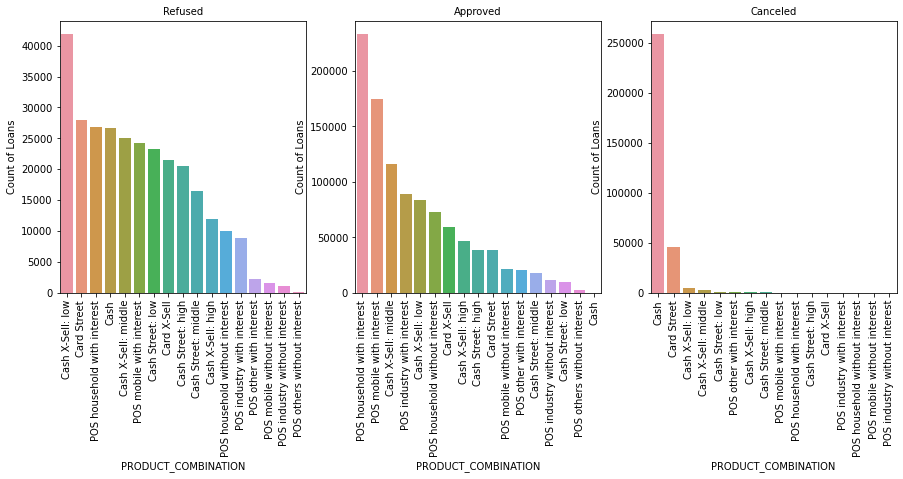

In [65]:
plot_3charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

**Observation**

- We observe most number of loans were approved for POS household with interest.
- Most number of refused loans were of Cash X-Sell: Low Product combination
- Most Canceled loans were Cash loans

In [66]:
previous_data["PRODUCT_COMBINATION"].isnull().sum()

346

In [67]:
previous_data["PRODUCT_COMBINATION"].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [68]:
#  analysing unique value for PRODUCT_COMBINATION 
previous_data["PRODUCT_COMBINATION"].unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

**Observation**

As we can see there are nan values for it. so we can impute with mode as this is in object datatype.

In [69]:
previous_data["PRODUCT_COMBINATION"].fillna(previous_data["PRODUCT_COMBINATION"].mode()[0], inplace=True)

In [70]:
previous_data["PRODUCT_COMBINATION"].isnull().sum()

0

**Observation**

We can see that now we have deal with missing value for PRODUCT_COMBINATION columns with mode.

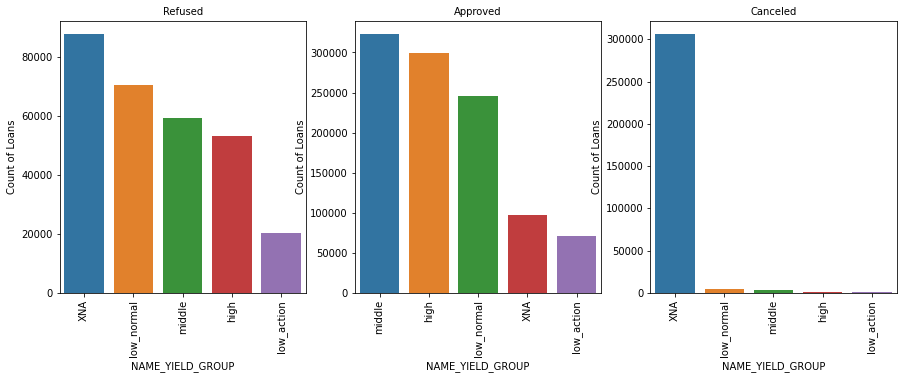

In [71]:
plot_3charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)

**Observation**

- Most approved loans were from Middle Yield Goup
- Most refused loans were from Yield Goups Not specified

In [72]:
null_values(previous_data)

,Total,Data_Type,Unique,Percent
DAYS_FIRST_DRAWING,673065,float64,2838,40.3
DAYS_FIRST_DUE,673065,float64,2892,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,float64,2803,40.3
DAYS_LAST_DUE,673065,float64,2873,40.3
DAYS_TERMINATION,673065,float64,2830,40.3
NFLAG_INSURED_ON_APPROVAL,673065,float64,2,40.3
NAME_TYPE_SUITE,0,object,8,0.0
NAME_CONTRACT_STATUS,0,object,4,0.0
CODE_REJECT_REASON,0,object,9,0.0
SK_ID_CURR,0,int64,338857,0.0


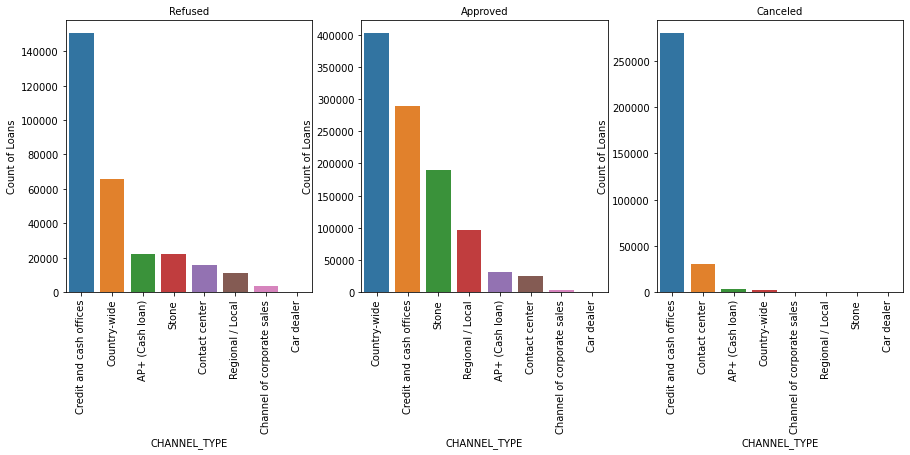

In [73]:
plot_3charts('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)

**Observation**

- Most approved loans were from Country-wide Channel
- Most refused loans were from Credit and Cash Offices Channel

In [74]:
cols_approved=['DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 
'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
approved_num=approved[cols_approved]

In [75]:
cols_refused=['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
refused_num=refused[cols_refused]

In [76]:
#calculating correlation for approved
approved_correlation = approved_num.corr()
round(approved_correlation, 3)

,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
DAYS_TERMINATION,1.000,0.928,0.488,0.316,-0.396,0.171,0.082,0.053,0.256,-0.393,0.149
DAYS_LAST_DUE,0.928,1.000,0.418,0.393,-0.258,0.197,0.099,0.087,0.264,-0.441,0.183
DAYS_LAST_DUE_1ST_VERSION,0.488,0.418,1.000,0.513,-0.804,-0.085,-0.081,-0.386,0.091,-0.076,-0.127
DAYS_FIRST_DUE,0.316,0.393,0.513,1.000,0.005,-0.059,-0.069,-0.209,0.014,-0.156,-0.072
DAYS_FIRST_DRAWING,-0.396,-0.258,-0.804,0.005,1.000,0.067,0.055,0.310,-0.085,0.014,0.106
AMT_GOODS_PRICE,0.171,0.197,-0.085,-0.059,0.067,1.000,0.846,0.649,0.926,-0.329,0.996
AMT_ANNUITY,0.082,0.099,-0.081,-0.069,0.055,0.846,1.000,0.396,0.860,-0.292,0.833
CNT_PAYMENT,0.053,0.087,-0.386,-0.209,0.310,0.649,0.396,1.000,0.612,-0.189,0.663
AMT_CREDIT,0.256,0.264,0.091,0.014,-0.085,0.926,0.860,0.612,1.000,-0.321,0.913
DAYS_DECISION,-0.393,-0.441,-0.076,-0.156,0.014,-0.329,-0.292,-0.189,-0.321,1.000,-0.329


In [77]:
c1=approved_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

DAYS_TERMINATION  DAYS_TERMINATION    1.000000
AMT_APPLICATION   AMT_GOODS_PRICE     0.996064
DAYS_LAST_DUE     DAYS_TERMINATION    0.927777
AMT_GOODS_PRICE   AMT_CREDIT          0.926013
AMT_APPLICATION   AMT_CREDIT          0.912704
AMT_CREDIT        AMT_ANNUITY         0.860329
AMT_GOODS_PRICE   AMT_ANNUITY         0.846416
AMT_APPLICATION   AMT_ANNUITY         0.833141
CNT_PAYMENT       AMT_APPLICATION     0.662863
AMT_GOODS_PRICE   CNT_PAYMENT         0.648596
dtype: float64

In [78]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_LAST_DUE              DAYS_FIRST_DRAWING          -0.258234
DAYS_DECISION              AMT_ANNUITY                 -0.292355
AMT_CREDIT                 DAYS_DECISION               -0.321365
AMT_APPLICATION            DAYS_DECISION               -0.329275
DAYS_DECISION              AMT_GOODS_PRICE             -0.329336
CNT_PAYMENT                DAYS_LAST_DUE_1ST_VERSION   -0.386446
DAYS_TERMINATION           DAYS_DECISION               -0.393206
                           DAYS_FIRST_DRAWING          -0.396110
DAYS_LAST_DUE              DAYS_DECISION               -0.441149
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING          -0.803504
dtype: float64

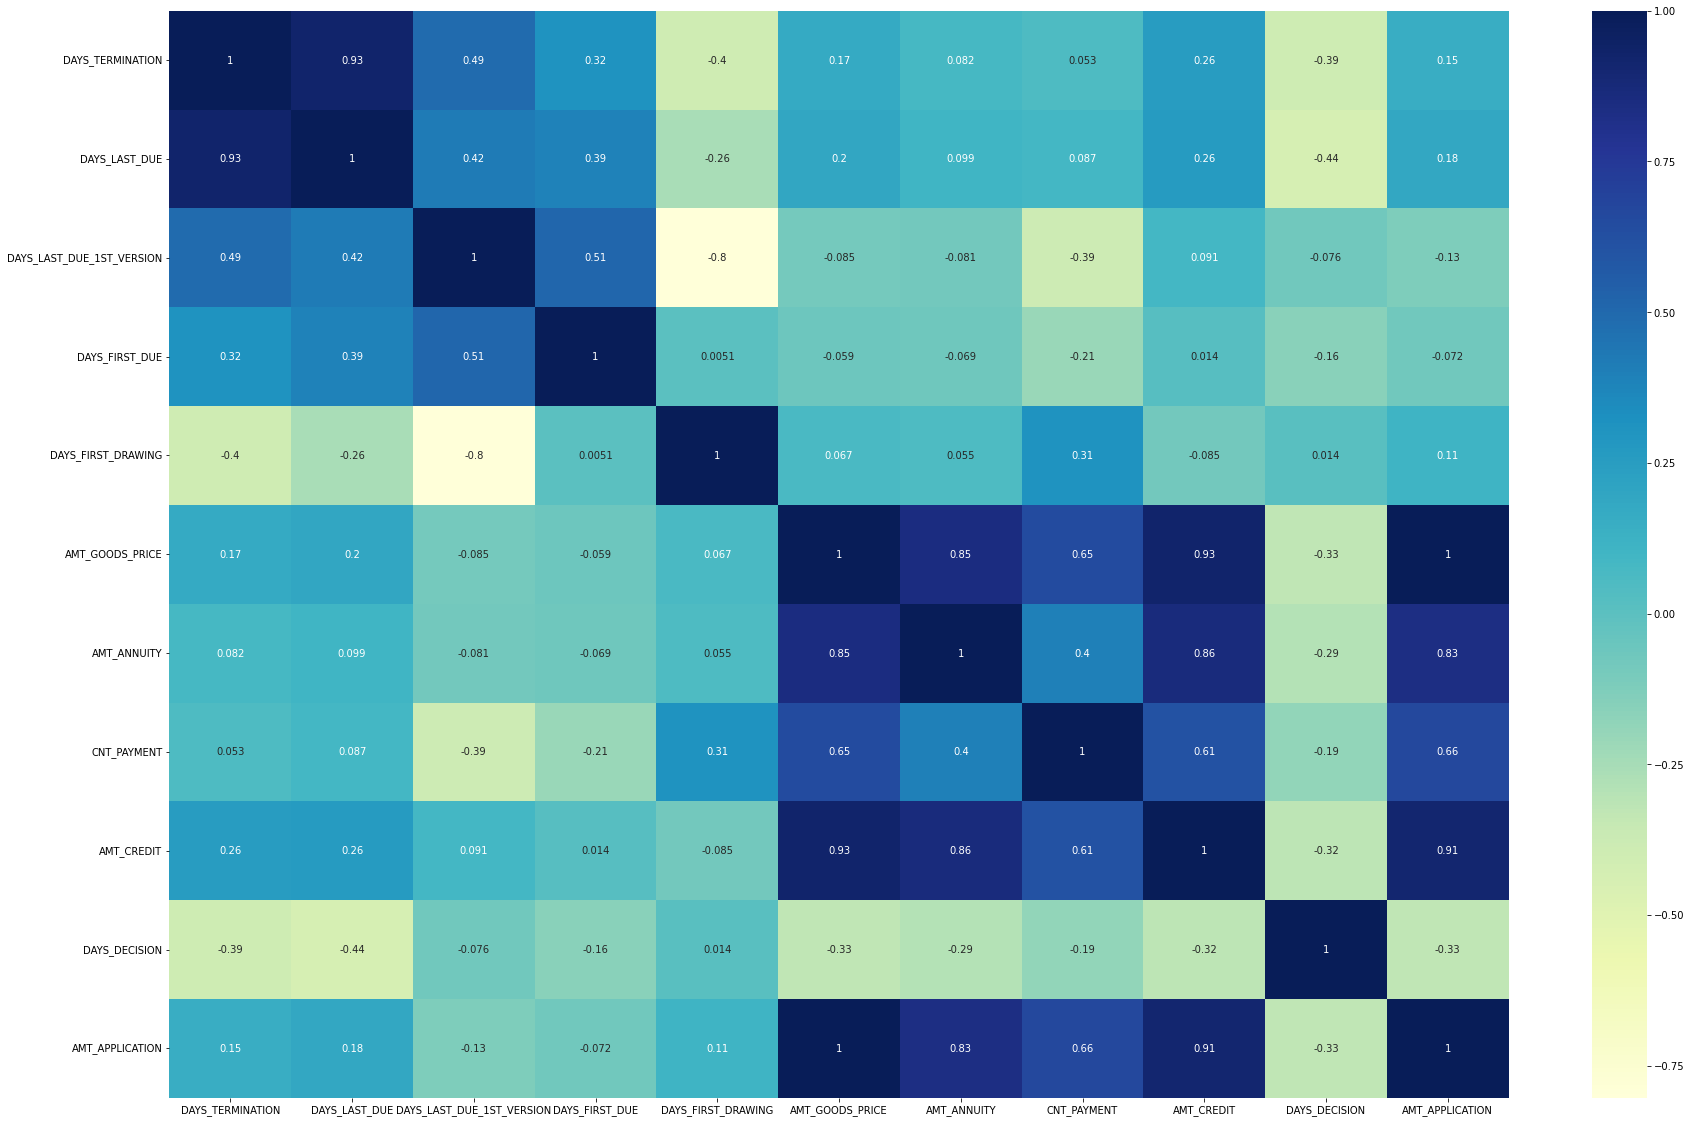

In [79]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(approved_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [80]:
#calculating correlation for approved
refused_correlation = refused_num.corr()
round(refused_correlation, 3)

,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_GOODS_PRICE,1.000,0.832,0.692,0.949,-0.331,0.995
AMT_ANNUITY,0.832,1.000,0.559,0.845,-0.297,0.823
CNT_PAYMENT,0.692,0.559,1.000,0.689,-0.258,0.698
AMT_CREDIT,0.949,0.845,0.689,1.000,-0.314,0.949
DAYS_DECISION,-0.331,-0.297,-0.258,-0.314,1.000,-0.309
AMT_APPLICATION,0.995,0.823,0.698,0.949,-0.309,1.000


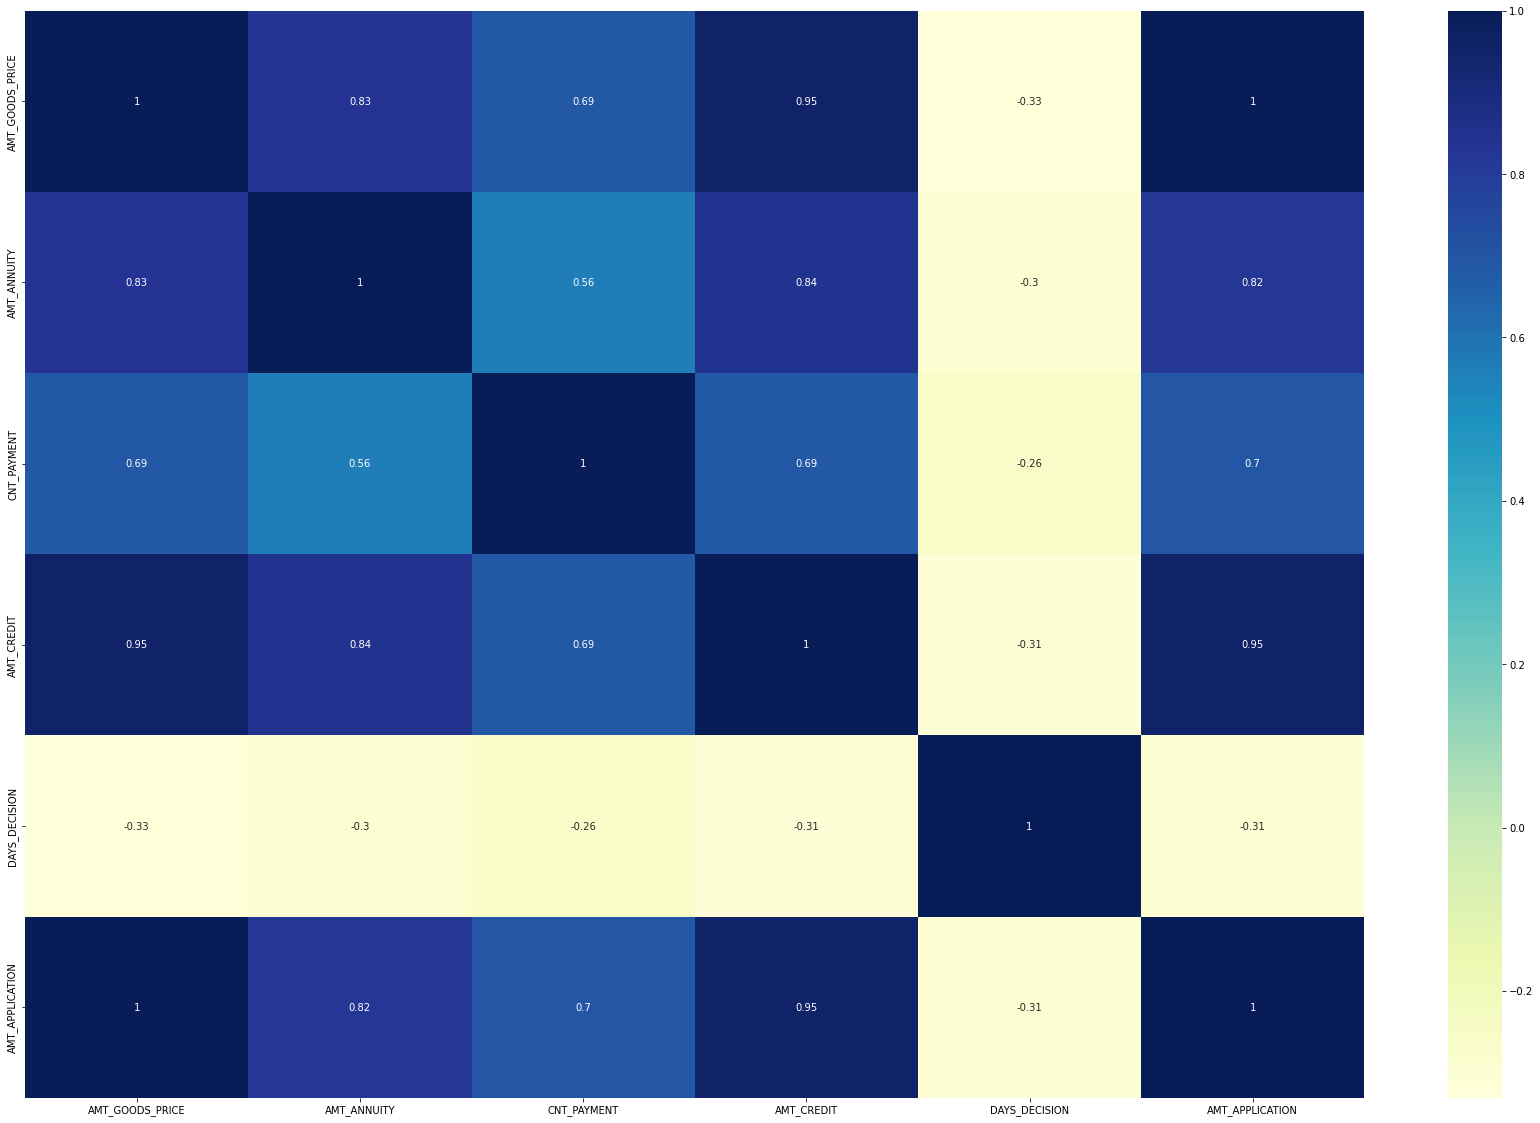

In [81]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(refused_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [82]:
c2=refused_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

AMT_GOODS_PRICE  AMT_GOODS_PRICE    1.000000
                 AMT_APPLICATION    0.995035
                 AMT_CREDIT         0.949404
AMT_CREDIT       AMT_APPLICATION    0.948959
AMT_ANNUITY      AMT_CREDIT         0.844922
AMT_GOODS_PRICE  AMT_ANNUITY        0.832327
AMT_ANNUITY      AMT_APPLICATION    0.822712
AMT_APPLICATION  CNT_PAYMENT        0.697709
AMT_GOODS_PRICE  CNT_PAYMENT        0.692047
CNT_PAYMENT      AMT_CREDIT         0.688533
dtype: float64

In [83]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

AMT_ANNUITY      AMT_APPLICATION    0.822712
AMT_APPLICATION  CNT_PAYMENT        0.697709
AMT_GOODS_PRICE  CNT_PAYMENT        0.692047
CNT_PAYMENT      AMT_CREDIT         0.688533
                 AMT_ANNUITY        0.559074
                 DAYS_DECISION     -0.258137
DAYS_DECISION    AMT_ANNUITY       -0.296965
                 AMT_APPLICATION   -0.308925
                 AMT_CREDIT        -0.314398
                 AMT_GOODS_PRICE   -0.330909
dtype: float64

In [84]:
null_values(previous_data)

,Total,Data_Type,Unique,Percent
DAYS_FIRST_DRAWING,673065,float64,2838,40.3
DAYS_FIRST_DUE,673065,float64,2892,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,float64,2803,40.3
DAYS_LAST_DUE,673065,float64,2873,40.3
DAYS_TERMINATION,673065,float64,2830,40.3
NFLAG_INSURED_ON_APPROVAL,673065,float64,2,40.3
NAME_TYPE_SUITE,0,object,8,0.0
NAME_CONTRACT_STATUS,0,object,4,0.0
CODE_REJECT_REASON,0,object,9,0.0
SK_ID_CURR,0,int64,338857,0.0


In [85]:
null_values(previous_data)

,Total,Data_Type,Unique,Percent
DAYS_FIRST_DRAWING,673065,float64,2838,40.3
DAYS_FIRST_DUE,673065,float64,2892,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,float64,2803,40.3
DAYS_LAST_DUE,673065,float64,2873,40.3
DAYS_TERMINATION,673065,float64,2830,40.3
NFLAG_INSURED_ON_APPROVAL,673065,float64,2,40.3
NAME_TYPE_SUITE,0,object,8,0.0
NAME_CONTRACT_STATUS,0,object,4,0.0
CODE_REJECT_REASON,0,object,9,0.0
SK_ID_CURR,0,int64,338857,0.0


# After Analysing for both dataset application_data and previous_data, Analysing now with merging these two dataset.

In [86]:
# loading application_data from previous section
application_data = pd.read_csv("application_data_clean.csv")
application_data.head()

,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,FLAG_OWN_REALTY,AMT_CREDIT,AMT_INCOME_TOTAL,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_ANNUITY,SK_ID_CURR,AMT_INCOME_TYPE,AMT_CREDIT_TYPE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AGE
0,Laborers,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,3.510,0,Cash loans,M,1134.0,Y,4.065975,2.025,N,N,1,N,N,N,N,10,WEDNESDAY,1.0,Business Entity Type 3,2120,3648.0,637,25,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,24700.5,100002,MEDIUM,LOW,Very_Young,-1.745205,0-5,2L-3L,4L-5L,3L-4L,-0.068493
1,Laborers,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,1.350,0,Revolving loans,M,815.0,Y,1.350000,0.675,N,N,0,N,N,N,N,9,MONDAY,1.0,Government,2531,4260.0,225,52,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,6750.0,100004,VERY_LOW,VERY_LOW,Middle_Age,-0.616438,0-5,0-1L,1L-2L,1L-2L,-0.142466
2,Laborers,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,0.0,2.0,2.0,0.0,2.970,0,Cash loans,F,617.0,Y,3.126825,1.350,N,N,0,N,N,N,N,17,WEDNESDAY,2.0,Business Entity Type 3,2437,9833.0,3039,52,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,29686.5,100006,LOW,LOW,Middle_Age,-8.326027,5-10,1L-2L,3L-4L,2L-3L,-0.142466
3,Core staff,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,5.130,0,Cash loans,M,1106.0,Y,5.130000,1.215,Y,Y,0,N,N,N,N,11,THURSDAY,1.0,Religion,3458,4311.0,3038,54,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,21865.5,100007,LOW,LOW,Middle_Age,-8.323288,5-10,1L-2L,5L-6L,5L-6L,-0.147945
4,Laborers,0.0,0.0,0.0,0.0,1.0,1.0,"Spouse, partner",0.0,0.0,0.0,0.0,4.545,0,Cash loans,M,2536.0,Y,4.904955,0.990,N,N,0,N,N,N,N,16,WEDNESDAY,2.0,Other,477,4970.0,1588,46,0.035792,House / apartment,Married,Secondary / secondary special,State servant,27517.5,100008,VERY_LOW,LOW,Middle_Age,-4.350685,0-5,0-1L,4L-5L,4L-5L,-0.126027


In [87]:
application_data.shape

(166714, 51)

In [88]:
previous_data.shape

(1670214, 30)

In [89]:
# merge both the dataframe on SK_ID_CURR with Inner Joins
loan_df = pd.merge(application_data, previous_data, how='inner', on='SK_ID_CURR')
loan_df.head()

,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_x,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE_x,CNT_CHILDREN,NAME_CONTRACT_TYPE_x,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,FLAG_OWN_REALTY,AMT_CREDIT_x,AMT_INCOME_TOTAL,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_ANNUITY_x,SK_ID_CURR,AMT_INCOME_TYPE,AMT_CREDIT_TYPE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AGE,NAME_TYPE_SUITE_y,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,CNT_PAYMENT,PRODUCT_COMBINATION,CHANNEL_TYPE,NAME_PRODUCT_TYPE,NAME_YIELD_GROUP,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,SK_ID_PREV,NAME_CLIENT_TYPE,CODE_REJECT_REASON,DAYS_DECISION,NAME_CONTRACT_STATUS,NAME_CASH_LOAN_PURPOSE,AMT_CREDIT_y,AMT_APPLICATION,NAME_CONTRACT_TYPE_y,NAME_PAYMENT_TYPE,YEARLY_DECISION
0,Laborers,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,3.51,0,Cash loans,M,1134.0,Y,4.065975,2.025,N,N,1,N,N,N,N,10,WEDNESDAY,1.0,Business Entity Type 3,2120,3648.0,637,25,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,24700.5,100002,MEDIUM,LOW,Very_Young,-1.745205,0-5,2L-3L,4L-5L,3L-4L,-0.068493,Unknown,0.0,365243.0,565.0,125.0,25.0,17.0,179055.0,9251.775,24.0,POS other with interest,Stone,XNA,low_normal,500,Auto technology,Vehicles,POS,1038818,New,XAP,606,Approved,XAP,179055.0,179055.0,Consumer loans,XNA,2
1,Laborers,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,1.35,0,Revolving loans,M,815.0,Y,1.350000,0.675,N,N,0,N,N,N,N,9,MONDAY,1.0,Government,2531,4260.0,225,52,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,6750.0,100004,VERY_LOW,VERY_LOW,Middle_Age,-0.616438,0-5,0-1L,1L-2L,1L-2L,-0.142466,Unaccompanied,0.0,365243.0,784.0,694.0,724.0,714.0,24282.0,5357.250,4.0,POS mobile without interest,Regional / Local,XNA,middle,30,Connectivity,Mobile,POS,1564014,New,XAP,815,Approved,XAP,20106.0,24282.0,Consumer loans,Cash through the bank,3
2,Laborers,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,0.0,2.0,2.0,0.0,2.97,0,Cash loans,F,617.0,Y,3.126825,1.350,N,N,0,N,N,N,N,17,WEDNESDAY,2.0,Business Entity Type 3,2437,9833.0,3039,52,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,29686.5,100006,LOW,LOW,Middle_Age,-8.326027,5-10,1L-2L,3L-4L,2L-3L,-0.142466,Unaccompanied,0.0,365243.0,151.0,1259.0,151.0,143.0,383512.5,24246.000,48.0,Cash X-Sell: low,Credit and cash offices,x-sell,low_normal,-1,XNA,XNA,Cash,2078043,Repeater,XAP,181,Approved,XNA,504805.5,422820.0,Cash loans,Cash through the bank,1
3,Laborers,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,0.0,2.0,2.0,0.0,2.97,0,Cash loans,F,617.0,Y,3.126825,1.350,N,N,0,N,N,N,N,17,WEDNESDAY,2.0,Business Entity Type 3,2437,9833.0,3039,52,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,29686.5,100006,LOW,LOW,Middle_Age,-8.326027,5-10,1L-2L,3L-4L,2L-3L,-0.142466,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,11250.000,12.0,Card Street,Credit and cash offices,XNA,XNA,-1,XNA,XNA,XNA,2827850,Repeater,XAP,181,Canceled,XAP,0.0,0.0,Revolving loans,XNA,1
4,Laborers,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,0.0,2.0,2.0,0.0,2.97,0,Cash loans,F,617.0,Y,3.126825,1.350,N,N,0,N,N,N,N,17,WEDNESDAY,2.0,Business Entity Type 3,2437,9833.0,3039,52,0.008019,House / apartment,Civil marriage,Secondary / secondary specia

In [90]:
#Checking the details of the merged dataframe
loan_df.shape

(785318, 80)

In [91]:
# checking the columns and column types of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785318 entries, 0 to 785317
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   OCCUPATION_TYPE              785318 non-null  object  
 1   AMT_REQ_CREDIT_BUREAU_HOUR   785318 non-null  float64 
 2   AMT_REQ_CREDIT_BUREAU_DAY    785318 non-null  float64 
 3   AMT_REQ_CREDIT_BUREAU_WEEK   785318 non-null  float64 
 4   AMT_REQ_CREDIT_BUREAU_MON    785318 non-null  float64 
 5   AMT_REQ_CREDIT_BUREAU_QRT    785318 non-null  float64 
 6   AMT_REQ_CREDIT_BUREAU_YEAR   785318 non-null  float64 
 7   NAME_TYPE_SUITE_x            785318 non-null  object  
 8   DEF_30_CNT_SOCIAL_CIRCLE     785318 non-null  float64 
 9   OBS_30_CNT_SOCIAL_CIRCLE     785318 non-null  float64 
 10  OBS_60_CNT_SOCIAL_CIRCLE     785318 non-null  float64 
 11  DEF_60_CNT_SOCIAL_CIRCLE     785318 non-null  float64 
 12  AMT_GOODS_PRICE_x            785318 non-null

In [92]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

In [93]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()

**Plotting Contract Status vs purpose of the loan**

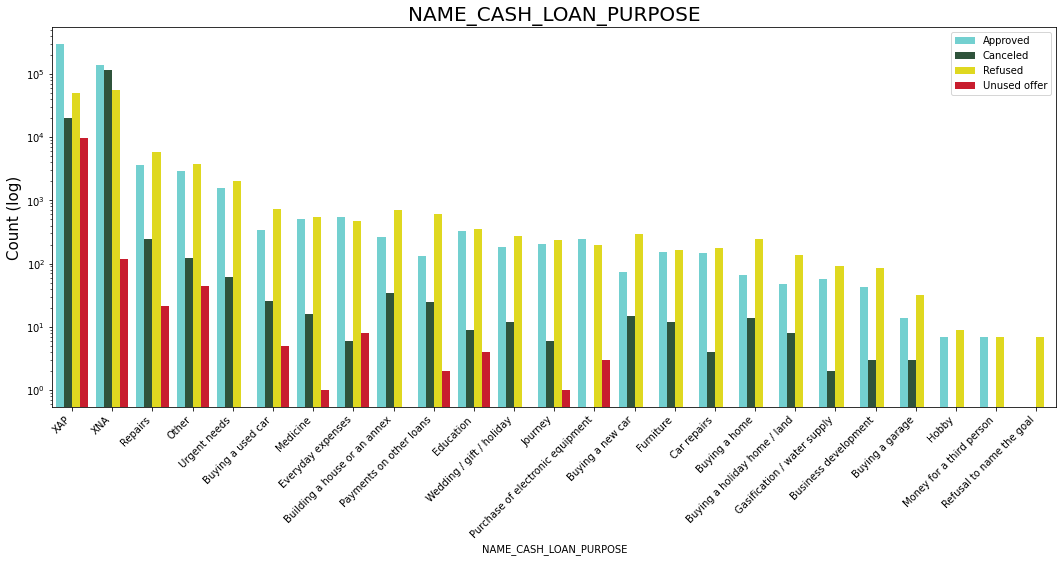

In [94]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#64dfdf","#295939","#fff600", "#e40017"],True,(18,7))

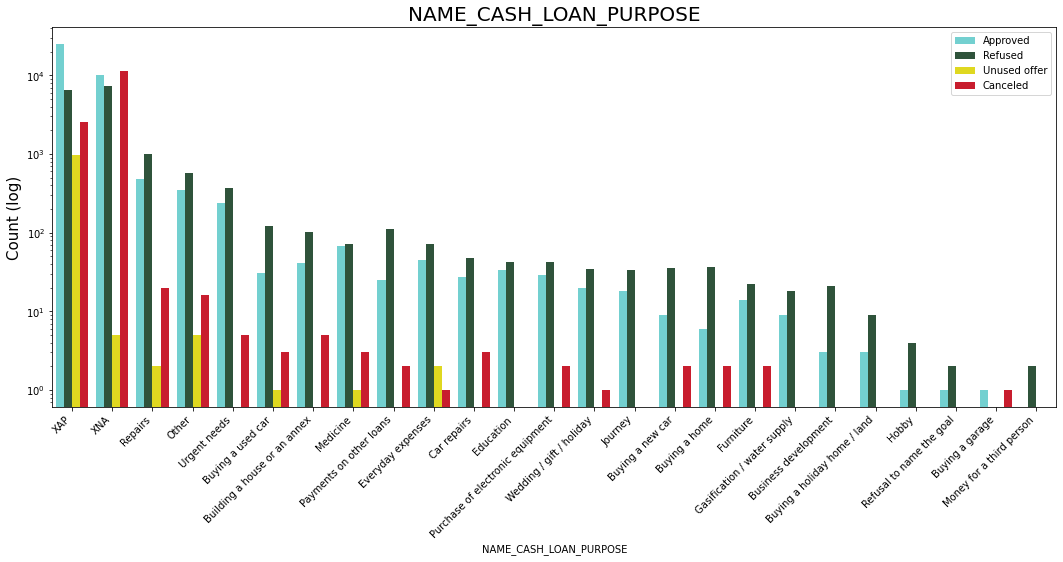

In [95]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#64dfdf","#295939","#fff600", "#e40017"],True,(18,7))

**Observation**
* **Loan purpose has high number of unknown values (XAP, XNA)**
* **Loan taken for the purpose of Repairs looks to have highest default rate**
* **Huge number application have been rejected by bank or refused by client which are applied for Repair or Other. from this we can infer that repair is considered high risk by bank. Also, either they are rejected or bank offers loan on high interest rate which is not feasible by the clients and they refuse the loan.**

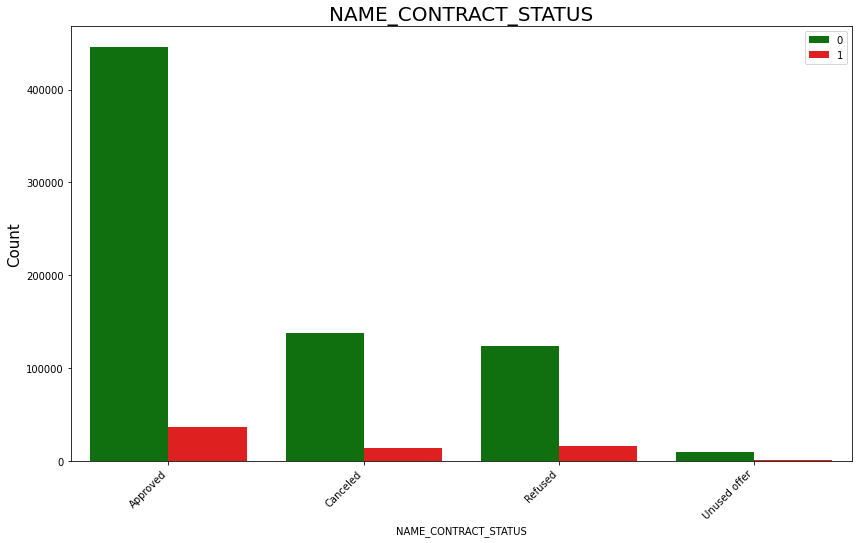

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       445727     92.42%
                     1        36557      7.58%
Canceled             0       137489      90.8%
                     1        13936       9.2%
Refused              0       124087     88.17%
                     1        16646     11.83%
Unused offer         0         9886      90.9%
                     1          990       9.1%

In [96]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['g','r'],False,(14,8))
r = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

**Observation**
* **90% of the previously cancelled client have actually repayed the loan. Revising the interest rates would increase business opportunity for these clients**
* **88% of the clients who have been previously refused a loan has payed back the loan in current case.**
* **Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.**

## Final Conclusions

#### After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization:

### A. Decisive Factor whether an applicant will be Defaulter:
1. **CODE_GENDER: Men are at relatively higher default rate**
2. **NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.**
3. **NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education**
4. **NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.**
5. **OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.**
6. **ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.**
7. **DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting**
8. **DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.**
9. **CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.**
10. **AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.**

### B. Decisive Factor whether an applicant will be Repayer:
1. **NAME_EDUCATION_TYPE: Academic degree has less defaults.**
2. **NAME_INCOME_TYPE: Student and Businessmen have no defaults.**
3. **ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 1%**
4. **DAYS_BIRTH: People above age of 50 have low probability of defaulting**
5. **DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate**
6. **AMT_INCOME_TOTAL:Applicant with Income more than 650,000 are less likely to default**
7. **CNT_CHILDREN: People with zero to two children tend to repay the loans.**

### C. Factors that Loan can be given on Condition of High Interest rate to mitigate any default risk leading to business loss:


1. **NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.**
2. **AMT_CREDIT: People who get loan for 3-6 Lakhs tend to default more than others and hence having higher interest specifically for this credit range would be ideal.**
3. **AMT_INCOME: Since 90% of the applications have Income total less than 3Lakhs and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.**
4. **CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.**
5. **NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.**

### D. Suggestions:
* **90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.**
* **88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.**